This notebook trains a Random Forest Classifier with all our features - Traditional Modelling approach

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
np.bool = np.bool_
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


hfont = {'fontname':'Georgia'}

In [2]:
df = pd.read_csv("data/features.csv")

In [3]:
features = df[["defense_type", 'corner_type','dynamic_movement', 'shot_attempt','closely_marked','attacking_setup']]

In [4]:
features.head()

,defense_type,corner_type,dynamic_movement,shot_attempt,closely_marked,attacking_setup
0,0,0,1,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,2
3,0,0,1,0,1,1
4,0,0,1,0,1,0


In [5]:
X = features.drop(['shot_attempt','attacking_setup'], axis=1)
y = features['shot_attempt']


In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced_subsample']
}

best_model = None
best_accuracy = 0


for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
       
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42,
                    
                )

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                model.fit(X_train, y_train)
       
                y_pred = model.predict(X_test)

    
                accuracy = accuracy_score(y_test, y_pred)

            
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model


print("Best Hyperparameters:", best_model.get_params())
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best Accuracy: 0.8333333333333334


In [15]:
X_train.iloc[0:1]

,defense_type,corner_type,dynamic_movement,closely_marked
556,0,0,0,0


In [16]:
best_model.feature_importances_

array([0.14721291, 0.57862529, 0.13563367, 0.13852812])

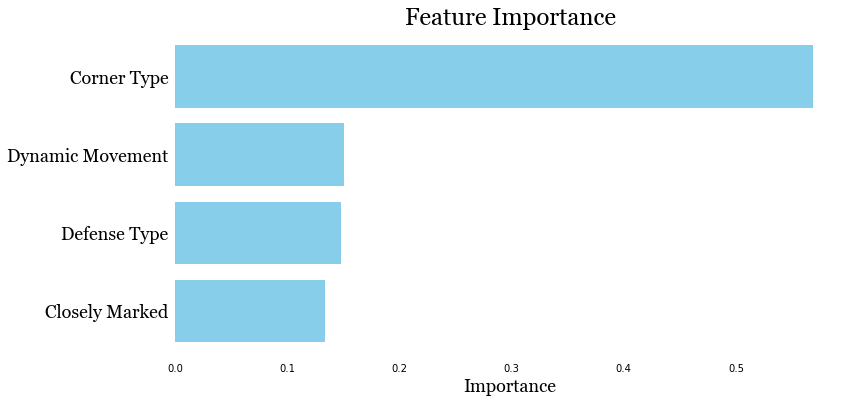

In [38]:
feature_names = ['Defense Type', 'Corner Type', 'Dynamic Movement', 'Closely Marked']
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))

bars = plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')

plt.box(False)
plt.tick_params(left=False, right=False, top=False, bottom=False)


hfont1 = {'fontname':'Georgia', 'fontsize': 24}
hfont = {'fontname':'Georgia', 'fontsize': 18}


plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], **hfont)


plt.xlabel('Importance', **hfont)

# Set title
plt.title('Feature Importance', **hfont1)
# plt.savefig("Feature Importance_RandomForestClassifier.png") 

plt.show()
